<a href="https://colab.research.google.com/github/gogifemi/cannabis-health-diagnosis/blob/main/notebooks/(colab)canhealth_cnn_learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [ ]:
!pip3 install torch===1.3.1 torchvision===0.4.2 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
!git clone https://github.com/gogifemi/cannabis-health-diagnosis.git

Cloning into 'cannabis-health-diagnosis'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 133 (delta 22), reused 11 (delta 6), pack-reused 85 (from 1)
Receiving objects: 100% (133/133), 212.98 MiB | 22.43 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Updating files: 100% (19/19), done.


In [3]:
!unzip /content/cannabis-health-diagnosis/data.zip -d /content/cannabis-health-diagnosis/data/

Archive:  /content/cannabis-health-diagnosis/data.zip
   creating: /content/cannabis-health-diagnosis/data/test/
   creating: /content/cannabis-health-diagnosis/data/train/
   creating: /content/cannabis-health-diagnosis/data/valid/
   creating: /content/cannabis-health-diagnosis/data/test/Aphids/
   creating: /content/cannabis-health-diagnosis/data/test/Botrytis/
   creating: /content/cannabis-health-diagnosis/data/test/Dehydration/
   creating: /content/cannabis-health-diagnosis/data/test/Healthy/
   creating: /content/cannabis-health-diagnosis/data/test/Leaf Miners/
   creating: /content/cannabis-health-diagnosis/data/test/Nitrogen Deficiency/
   creating: /content/cannabis-health-diagnosis/data/test/Nutrient Burn/
   creating: /content/cannabis-health-diagnosis/data/test/Overwatering/
   creating: /content/cannabis-health-diagnosis/data/test/PH Fluctuation/
   creating: /content/cannabis-health-diagnosis/data/test/Phosphorus Deficiency/
   creating: /content/cannabis-health-diagnos

In [4]:
!ls /content/cannabis-health-diagnosis/data/

test  train  valid


In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
!apt-get install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package torch=
E: Unable to locate package torchvision=
E: Unable to locate package https://download.pytorch.org/whl
E: Couldn't find any package by glob 'https://download.pytorch.org/whl'
E: Couldn't find any package by regex 'https://download.pytorch.org/whl'


In [25]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.all import imagenet_stats, ClassificationInterpretation
from fastai.metrics import error_rate, accuracy
from fastai.vision.data import ImageDataLoaders
import gdown

In [26]:
from fastai import get_transforms

ImportError: cannot import name 'get_transforms' from 'fastai' (/usr/local/lib/python3.10/dist-packages/fastai/__init__.py)

In [ ]:
# prompt: import imagenet_stats, ClassificationInterpretation, get_transforms

from fastai.vision.learner import *
from fastai.vision.models.xresnet import *
from fastai.vision.models.unet import *
from fastai.callback.schedule import *
from fastai.callback.hook import *
from fastai.callback.progress import *
from fastai.callback.tracker import *


from fastai.vision.all import imagenet_stats, ClassificationInterpretation, get_transforms


In [6]:
# Defining the path to the data
data_path = '/content/cannabis-health-diagnosis/data'

In [12]:
batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)]

In [13]:
# Loading the image-based dataset
img_data = ImageDataLoaders.from_folder(path=data_path, train='train', valid='valid', ds_tfms=batch_tfms, size=128, bs=100)

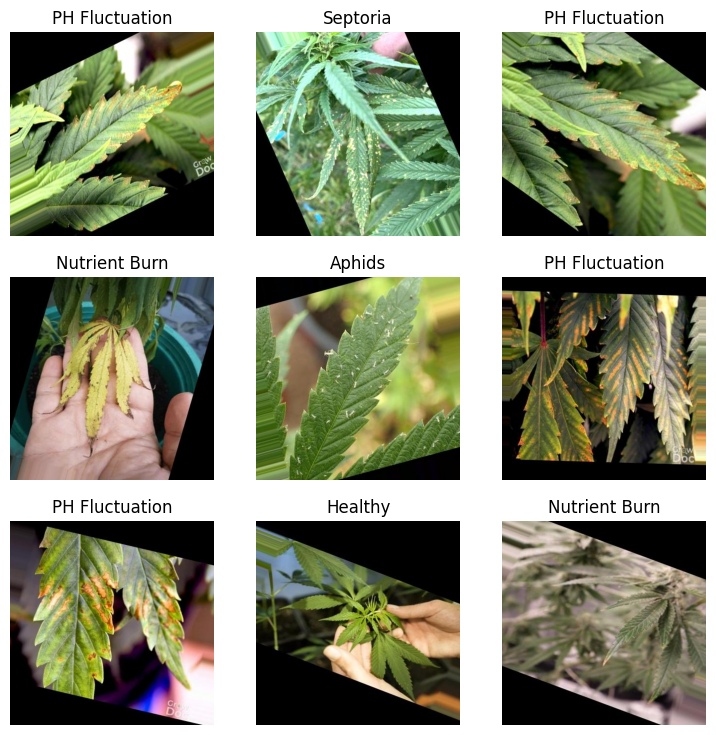

In [17]:
img_data.show_batch()

In [18]:
model = vision_learner(img_data, models.resnet50, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 92.0MB/s]


In [19]:
model.summary()

Sequential (Input shape: 100 x 3 x 416 x 416)
Layer (type)         Output Shape         Param #    Trainable 
                     100 x 64 x 208 x 20 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     100 x 64 x 104 x 10 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

In [20]:
model.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.729206,2.678554,0.165385,0.834615,00:20
1,2.352515,1.929259,0.492308,0.507692,00:20
2,1.476146,1.990224,0.519231,0.480769,00:20
3,0.990847,2.037743,0.523077,0.476923,00:19
4,0.700502,2.047708,0.523077,0.476923,00:20
5,0.514258,2.056686,0.530769,0.469231,00:21
6,0.388757,2.043540,0.519231,0.480769,00:22


In [21]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.056982,2.078774,0.515385,0.484615,00:20
1,0.050937,2.141627,0.511538,0.488462,00:20
2,0.040723,2.195405,0.507692,0.492308,00:20
3,0.035136,2.187711,0.511538,0.488462,00:20
4,0.030842,2.191627,0.511538,0.488462,00:20


In [23]:
model.save('cnn_learner_12cycles')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.pth')

In [25]:
model.save('cnn_learner_12cycles.h5')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.h5.pth')

In [26]:
interpret = ClassificationInterpretation.from_learner(model)

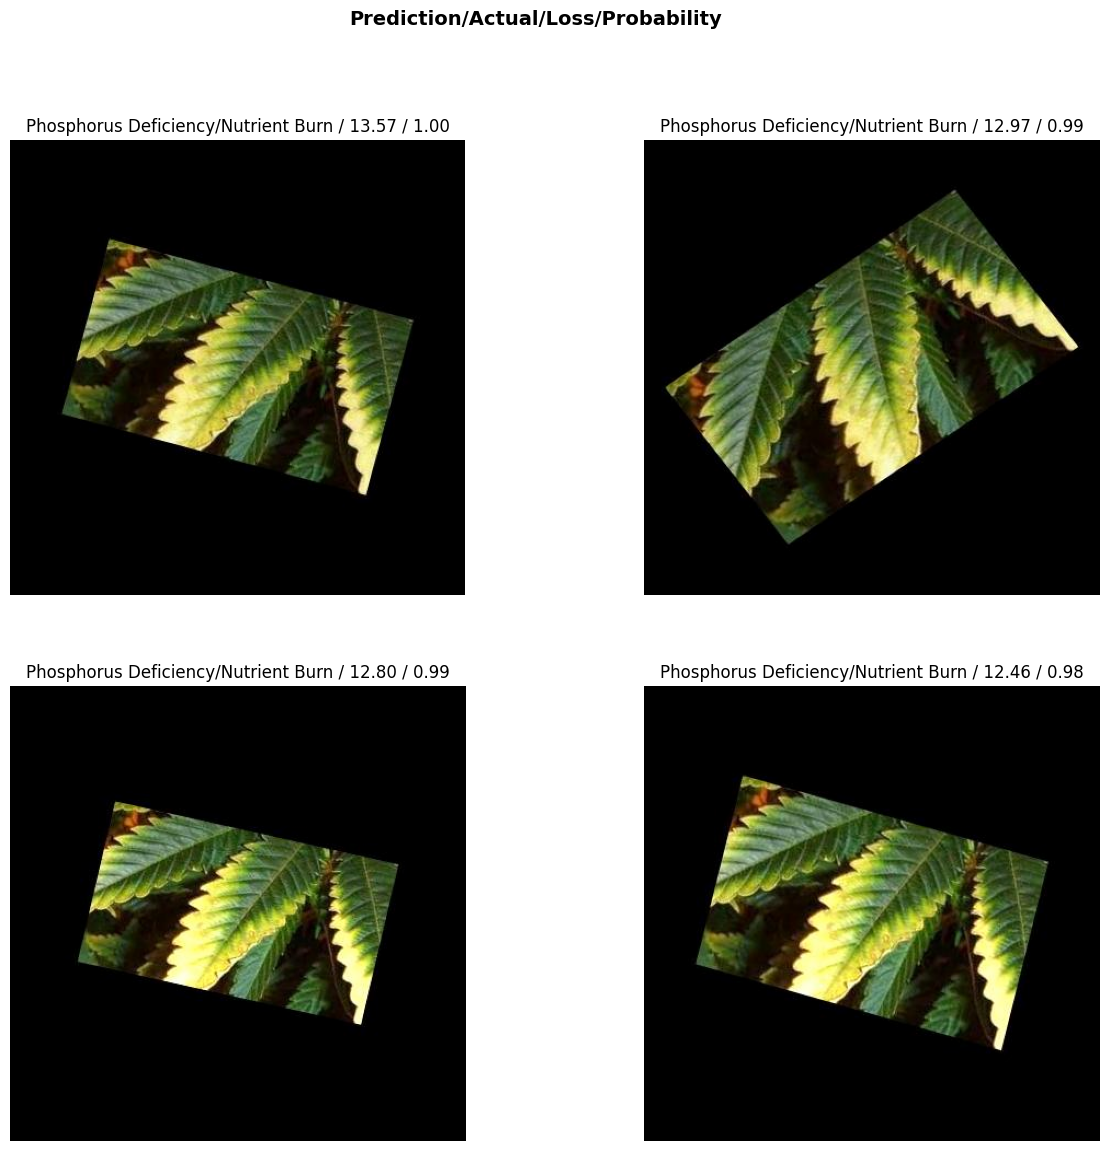

In [31]:
interpret.plot_top_losses(4, figsize=(15, 13))

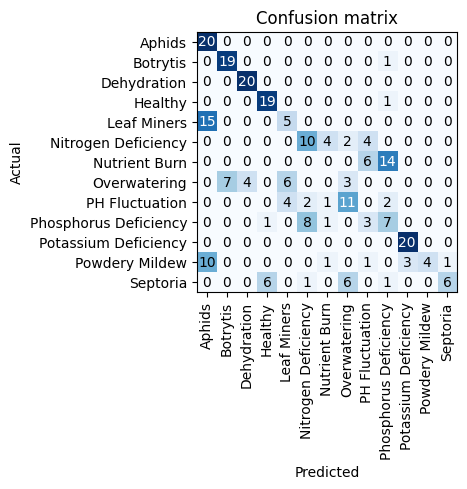

In [33]:
interpret.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.004365158267319202)

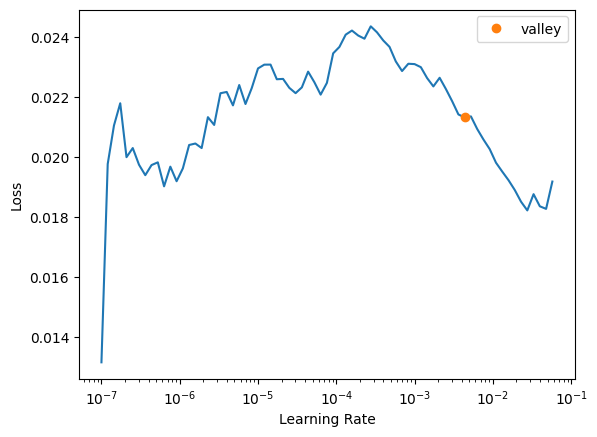

In [34]:
model.lr_find()

In [38]:
model.unfreeze()
model.fit_one_cycle(3, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.086790,3644.769775,0.111538,0.888462,00:27
1,1.081750,72.414055,0.076923,0.923077,00:27
2,0.731208,2.920332,0.465385,0.534615,00:25


In [40]:
model.unfreeze()
model.fit_one_cycle(5, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.194535,8.531229,0.211538,0.788462,00:29
1,0.377305,18.780676,0.180769,0.819231,00:26
2,0.337254,8.802637,0.353846,0.646154,00:25
3,0.247680,4.244514,0.526923,0.473077,00:25
4,0.176186,3.399903,0.496154,0.503846,00:26


In [ ]:
model.save('models/cnn_learner_lr8cycles')

In [ ]:
model.save('modelsh5/cnn_learner_lr8cycles.h5')

SuggestedLRs(valley=0.002511886414140463)

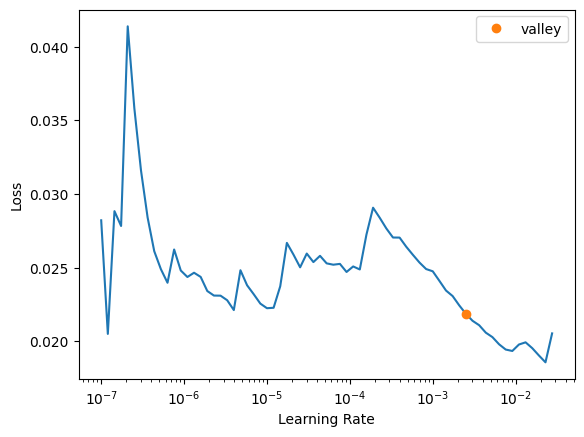

In [43]:
model.freeze()
model.lr_find()

In [44]:
lr = 1e-3/2
model.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.044342,3.593268,0.523077,0.476923,00:20
1,0.034671,3.610157,0.538462,0.461538,00:21
2,0.026544,3.595436,0.534615,0.465385,00:20
3,0.019239,3.642842,0.526923,0.473077,00:20
4,0.017110,3.683828,0.523077,0.476923,00:20
5,0.014610,3.670907,0.526923,0.473077,00:20
6,0.012640,3.705325,0.526923,0.473077,00:20
7,0.011103,3.715362,0.526923,0.473077,00:20
8,0.010989,3.744009,0.519231,0.480769,00:20
9,0.009165,3.707028,0.526923,0.473077,00:21


In [45]:
model.fit_one_cycle(7, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.007321,3.718367,0.519231,0.480769,00:20
1,0.009183,3.747788,0.526923,0.473077,00:20
2,0.008140,3.781843,0.519231,0.480769,00:20
3,0.007324,3.751982,0.519231,0.480769,00:20
4,0.006922,3.784140,0.515385,0.484615,00:21
5,0.007084,3.813313,0.515385,0.484615,00:20
6,0.006418,3.812007,0.515385,0.484615,00:20


In [46]:
model.unfreeze()
model.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.002523,3.893997,0.519231,0.480769,00:26
1,0.042576,7.114769,0.273077,0.726923,00:26
2,0.076743,8.060145,0.261538,0.738462,00:25
3,0.077701,4.634580,0.488462,0.511538,00:25
4,0.070569,3.885277,0.465385,0.534615,00:26
5,0.059581,3.647324,0.526923,0.473077,00:25
6,0.044861,3.411870,0.530769,0.469231,00:26


In [47]:
model.unfreeze()
model.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.006984,3.314100,0.526923,0.473077,00:26
1,0.004077,3.243121,0.523077,0.476923,00:26
2,0.004939,3.993638,0.469231,0.530769,00:25
3,0.029060,8.467092,0.211538,0.788462,00:25
4,0.065101,5.639187,0.338462,0.661538,00:25
5,0.061974,5.210704,0.411538,0.588462,00:26
6,0.059854,4.212214,0.461538,0.538462,00:26
7,0.047727,4.390201,0.496154,0.503846,00:25
8,0.037543,3.725633,0.496154,0.503846,00:26
9,0.028903,4.034068,0.500000,0.500000,00:25


In [48]:
model.save('cnn_learner_final')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_final.pth')

In [49]:
model.save('cnn_learner_final.h5')

Path('/content/cannabis-health-diagnosis/data/models/cnn_learner_final.h5.pth')

In [50]:
model.load('cnn_learner_final')

In [51]:
model.export('export_resnet34_model.pkl')

In [52]:
!zip -r /content/fastairestnet.zip /content/cannabis-health-diagnosis/data/models

  adding: content/cannabis-health-diagnosis/data/models/ (stored 0%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.h5.pth (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_final.h5.pth (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/export_resnet34_model.pkl (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_12cycles.pth (deflated 7%)
  adding: content/cannabis-health-diagnosis/data/models/cnn_learner_final.pth (deflated 7%)


In [53]:
from google.colab import files
files.download("/content/tuned_cnn_learner.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
interpret1 = ClassificationInterpretation.from_learner(model)

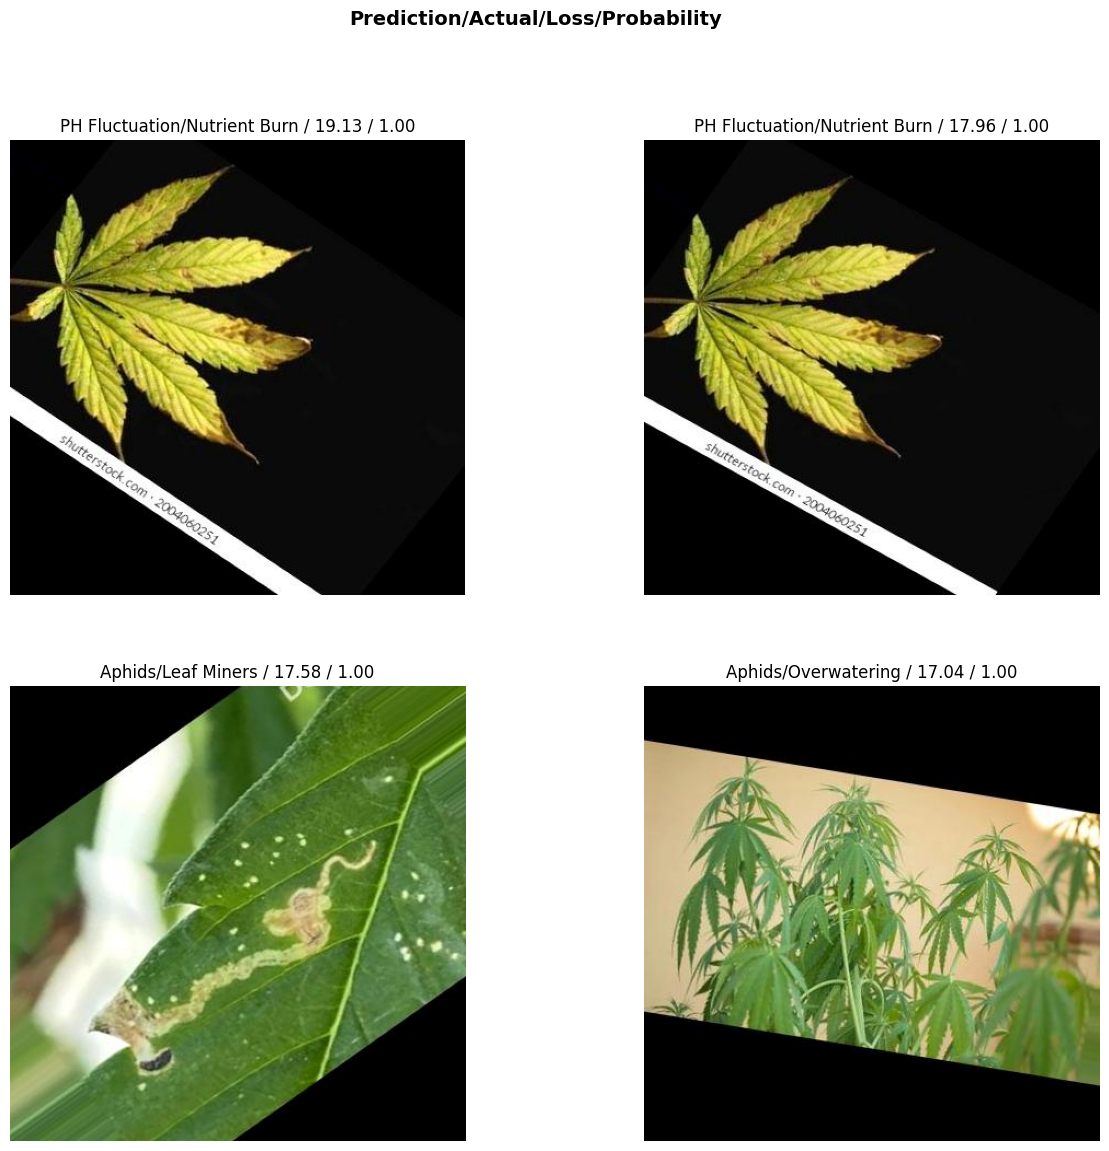

In [55]:
interpret1.plot_top_losses(4, figsize=(15, 13))

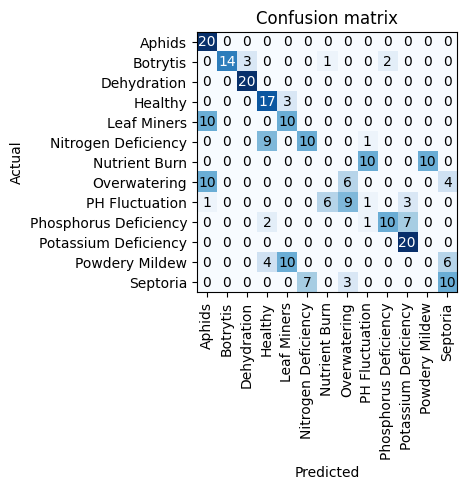

In [56]:
interpret1.plot_confusion_matrix()